#### baseline

0.2692307692307692
0.19444444444444445
0.22580645161290322
0.5471698113207547

#### baseline + onehot

0.3
0.25
0.2727272727272727
0.5471698113207547

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [35]:
df = pd.read_csv('../dataset/금연_dtx.csv')

In [36]:
df

,금연성공여부,성별,연령,흡연시작연령,담배종류,하루흡연량,FTND
0,0,1,52,25,1,3,8
1,0,1,32,17,1,4,7
2,1,1,41,21,1,2,0
3,1,1,60,18,1,2,6
4,1,1,28,19,4,2,2
...,...,...,...,...,...,...,...
1050,0,2,33,17,1,2,6
1051,0,2,24,20,5,2,3
1052,0,2,49,30,1,2,2
1053,1,2,55,30,1,3,5


In [37]:
df['FTND']

0       8
1       7
2       0
3       6
4       2
       ..
1050    6
1051    3
1052    2
1053    5
1054    4
Name: FTND, Length: 1055, dtype: int64

# One-hot encoding

In [38]:
smoke_kind = pd.get_dummies(df['담배종류'], prefix = '담배종류')
sex = pd.get_dummies(df['성별'], prefix = '성별')
FTND = pd.get_dummies(df['FTND'], prefix= 'FTND')

In [39]:
df = pd.concat([df,smoke_kind,sex,FTND],axis=1)
df = df.drop(['담배종류','성별','FTND'],axis=1)

In [40]:
df.rename(columns={'성별_1' : '남', '성별_2' : '여'},inplace=True)

In [41]:
df

,금연성공여부,연령,흡연시작연령,하루흡연량,담배종류_1,담배종류_2,담배종류_4,담배종류_5,담배종류_6,담배종류_7,...,FTND_1,FTND_2,FTND_3,FTND_4,FTND_5,FTND_6,FTND_7,FTND_8,FTND_9,FTND_10
0,0,52,25,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,32,17,4,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,41,21,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,60,18,2,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,28,19,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,33,17,2,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1051,0,24,20,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1052,0,49,30,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1053,1,55,30,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
X = df.drop(['금연성공여부'],axis=1)
y = df['금연성공여부']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True,  random_state=34)

In [43]:
params = {

}

In [44]:
model = XGBClassifier(**params)

xgb_model = model.fit(X_train, y_train)

[10:43:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [45]:
y_pre = xgb_model.predict(X_valid)
y_pred_probs = xgb_model.predict_proba(X_valid)[:,1]

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_valid, y_pre)
print(p)
r = recall_score(y_valid, y_pre)
print(r)
f1 = f1_score(y_valid, y_pre)
print(f1)
accuracy = accuracy_score(y_valid, y_pre)
print(accuracy)

0.3
0.25
0.2727272727272727
0.5471698113207547


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.

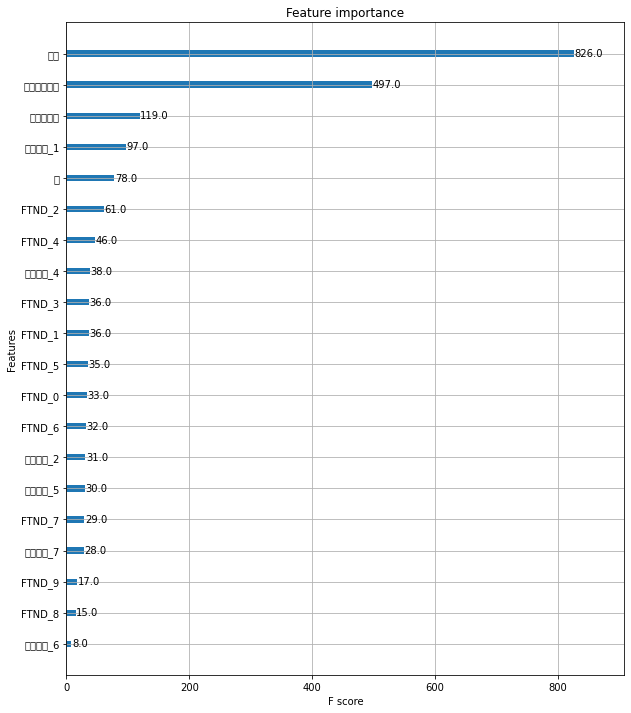

In [49]:
from matplotlib import pyplot as plt
from xgboost import plot_importance


plt.rcParams['font.family'] ='Gothic'
plt.rcParams['axes.unicode_minus'] =False
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)